In [10]:
import statsmodels.api as sm
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

statsmodels 기초 통계, 회귀 분석, 시계열 분석 등 다양한 `통계 분석` 기능을 제공하는 파이썬 패키지다.

In [3]:
data = sm.datasets.get_rdataset('Titanic')

<class 'statsmodels.datasets.utils.Dataset'>

In [5]:
df = data.data
df.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [6]:
print(data.__doc__)

+---------+-----------------+
| Titanic | R Documentation |
+---------+-----------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

    Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+----+----------+---------------------+
| No | Name     | Levels              |
+----+----------+---------------------+
| 1  | Class    | 1st, 2nd, 3rd, Crew |
+----+----------+---------------------+
| 2  | Sex      | Male, Female        |
+----+----------+---------------------+
| 3  | Age      | Child, Adult        |
+----+----------+---------------------+
| 4  | Survived | No, Yes             |
+----+----------+------------------

Scikit-Learn 패키지는 `머신 러닝 교육 및 실무`를 위한 파이썬 패키지다. 지도 학습, 비지도 학습 모형이 있다.

In [7]:
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [12]:
dfX = pd.DataFrame(boston.data,columns = boston.feature_names)
dfy = pd.DataFrame(boston.target,columns = ['MEDV'])
df = pd.concat([dfX,dfy],axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


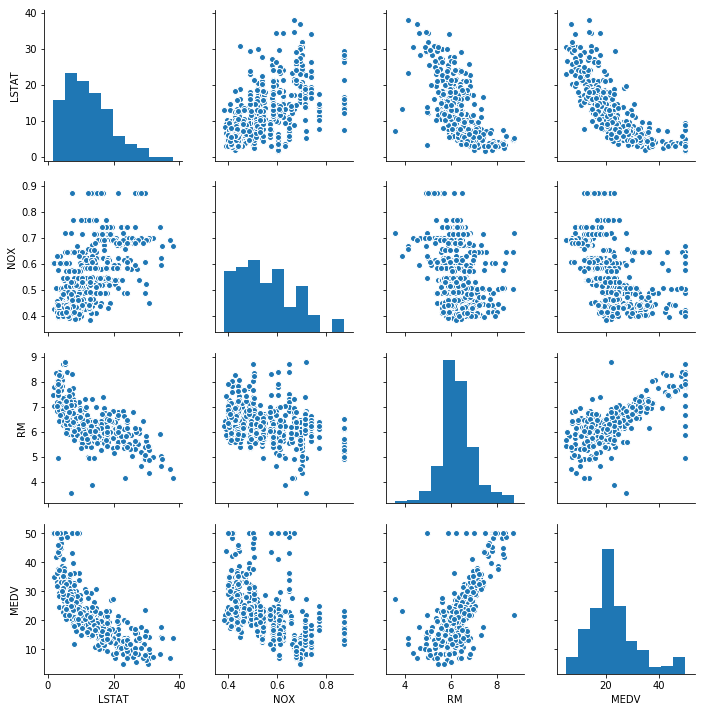

In [16]:
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

지금까지는 scikit-learn 패키지의 load 명령을 통한 데이터셋 생성을 하였고 지금부터는 make 명령을 통한 가상 데이터 생성을 해보겠습니다.

In [17]:
from sklearn.datasets import make_regression

In [18]:
X,y,w = make_regression(n_samples=10,n_features=1,bias=0,noise=0,coef=True,random_state=0)

In [19]:
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [20]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [21]:
w

array(79.17250381)

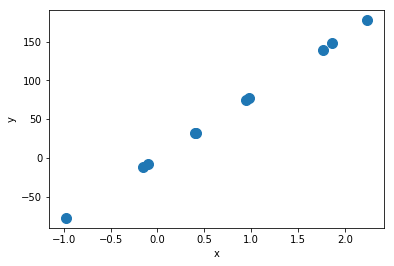

In [23]:
plt.scatter(X,y,s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
X,y,w = make_regression(n_samples=300,n_features=2,noise=10,coef=True,random_state=0)

In [30]:
X

(100, 2)

In [26]:
y

array([-7.52841732e+01, -7.39943605e+01,  4.18142143e+00,  6.23704873e+01,
       -1.46591087e+02, -5.46450641e+01,  3.63787366e+01, -9.92793688e-02,
        1.62092861e+02,  2.18523841e+01, -4.65126472e+01, -6.48175061e+01,
       -5.73104261e+00,  1.03980748e+02, -4.05993340e+00,  1.77689288e+02,
       -9.08474554e+01,  6.46432773e+01,  6.57187264e+01, -9.21369491e+01,
       -9.64135081e+01,  4.62701099e+01, -6.74635132e+01, -1.61702936e+01,
       -9.29819400e+01, -1.25980688e+02, -9.96497685e+01, -4.05182951e+01,
        4.50501574e+01, -2.74219623e+01, -2.15594345e+01, -1.76869830e+02,
       -8.94312826e+01,  8.84728113e+01, -2.51077215e+01,  8.46785210e+00,
        7.07616472e+01,  1.76066456e+02,  9.28791244e+00,  5.65184313e+01,
        9.21163622e+01, -9.05297429e+01,  5.11537387e+01,  1.04087756e+02,
        1.97219520e+02, -3.00148999e+01,  1.16411063e+01,  4.50647229e+01,
       -8.05016997e+01,  1.80926099e+02, -3.02902171e+01, -8.20630163e+01,
       -1.05193871e+02, -

In [27]:
w

array([29.21475268, 96.19363785])

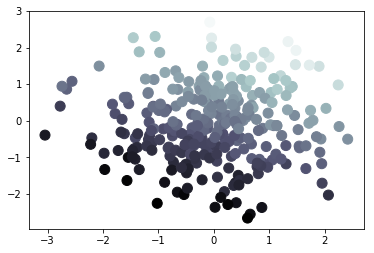

In [40]:
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap=mpl.cm.bone)
plt.show()

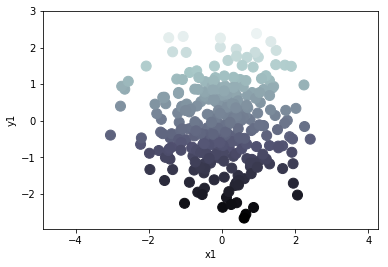

In [42]:
X,y,w = make_regression(n_samples=300,n_features=2,\
                        n_informative=1,noise=0,coef=True,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel('y1')
plt.axis('equal')
plt.show()

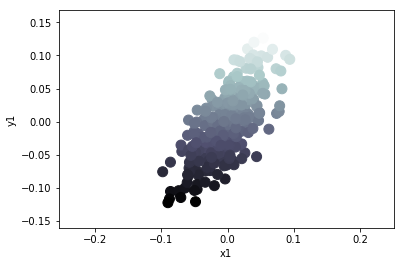

In [46]:
X,y,w = make_regression(n_samples=300,n_features=2,effective_rank=1,tail_strength=0,\
                        n_informative=1,noise=0,coef=True,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel('y1')
plt.axis('equal')
plt.show()

In [47]:
from sklearn.datasets import make_regression

In [48]:
X0,y,coef = make_regression(n_samples=100,n_features=2,bias=100,noise=10,coef=True,random_state=1)

In [53]:
X0.shape

(100, 2)

In [50]:
y

array([186.25546612,  70.28369976,  48.54383774,  81.88910288,
        70.36216661,  45.57917665,   6.94598586, 208.76917953,
       -47.77636788,  52.93562464, 109.02887309, 126.04856359,
       290.95126314, 118.00356014, 299.38088463, 228.35479769,
        80.80918335,  14.19379624, 149.70916278,  69.68590087,
       194.26822887,  87.22691265, 147.90300408, 194.88189428,
       141.44172936,  65.05212071, 137.7801633 ,  53.50211822,
       112.59429492, 122.79958197,  67.93928068,  98.55010164,
       143.44601128, 115.39323168,  76.54386333, 116.43707868,
        72.928342  , 208.66580219, 103.0263528 ,  91.11602315,
       126.07673063, 232.05303395,  27.03173937,  -2.67695316,
        39.26676076, 186.28880406, -17.04495891, 125.36522347,
       100.18881139, 182.08142411, 269.8438322 , 234.53742597,
       148.92166864, 215.05804417,  95.26432564, 124.84572407,
       127.71455299,  42.854506  ,  27.39755369, 153.16288893,
        74.28319319,  74.93652909, 141.37001951, 141.08

In [51]:
w

array([ 0.        , 97.58838684])

In [55]:
X0[:,0]

array([ 0.0465673 , -2.02220122, -0.38405435, -1.31228341, -0.88762896,
       -1.61577235, -2.43483776,  2.10025514, -0.50446586,  1.14472371,
        0.58281521,  0.07734007,  1.1110567 ,  0.61838026, -0.24863478,
       -1.89636092, -0.77516162,  0.5505375 , -0.85951594, -0.61736206,
        0.2135339 , -2.3015387 , -0.3198016 ,  0.40890054,  0.13770121,
       -0.63873041, -0.17470316, -0.87785842, -0.35224985, -0.9537006 ,
       -0.93576943,  0.03261455, -0.68372786,  0.41005165, -0.11905419,
       -1.14434139,  1.2245077 , -0.7612069 , -0.24937038,  1.6924546 ,
       -0.0731127 , -1.39649634,  0.86334532,  0.31515939, -1.07296862,
        0.4202822 , -0.34934272,  0.87616892,  0.53035547, -1.09989127,
        1.96710175,  1.51981682, -0.10015523, -0.61175641,  0.82797464,
        0.61720311,  0.68255141, -0.0126646 , -0.84520564,  1.12948391,
       -0.20075807,  0.90148689,  0.76201118, -0.62353073, -0.28730786,
        0.11900865,  0.3380117 , -0.29664115, -0.99702683, -1.12

In [56]:
X0[:,1]

array([ 0.80186103,  0.31563495, -0.3224172 ,  0.35054598, -0.19183555,
       -0.03869551, -0.31011677,  0.19091548, -1.44411381, -1.10061918,
        0.04221375,  0.42349435,  1.90465871,  0.07782113,  2.52832571,
        2.19069973, -0.02461696, -1.23005814,  0.84616065, -0.11044703,
        0.98633519,  0.86540763,  0.68006984,  1.12141771,  0.52946532,
       -0.37528495,  0.49521132, -0.17242821,  0.30017032,  0.74055645,
       -0.12289023, -0.26621851,  0.90085595,  0.18656139, -0.13644474,
        0.52057634, -0.44712856,  1.74481176,  0.3190391 , -0.74715829,
        0.28066508,  2.18557541, -1.19926803, -1.37311732, -0.52817175,
        0.60231928, -1.1425182 ,  0.16003707, -0.26788808,  1.13376944,
        1.27375593,  1.13162939,  0.44136444,  1.62434536, -0.30620401,
        0.12015895,  0.23249456, -0.67124613, -0.6871727 ,  0.12182127,
       -0.22232814, -0.64691669,  0.23009474,  0.79280687,  1.33145711,
        0.19829972,  1.62765075,  0.24879916, -0.51709446,  0.01

In [57]:
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [59]:
import statsmodels.api as sm
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [60]:
from sklearn.datasets import make_regression

In [65]:
bias = 100
X0,y,coef = make_regression(n_samples=100,n_features=1,bias=bias,noise=10,coef=True,\
                       random_state=1)
X = sm.add_constant(X0)#bias augmentation
y = y.reshape(len(y),1)#vectorization

In [63]:
coef

array(80.71051956)

In [66]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
w
# 선형 회귀를 통해 구한 결과는 실제와 비슷하지만 정확하지는 않다는 것을 알 수 있다.X,

array([[102.02701439],
       [ 81.59750943]])

In [83]:
w = np.linalg.lstsq(X,y)[0]
w

/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[102.02701439],
       [ 81.59750943]])

In [88]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)
y_new[:5]
# there are two values in 'w' one is resid(bias--constant) the other is parameter of this
# linear regression equation therefore, we took bias augmentation in our X feature matrix.

array([[-85.77281113],
       [-82.0744542 ],
       [-78.37609728],
       [-74.67774036],
       [-70.97938344]])

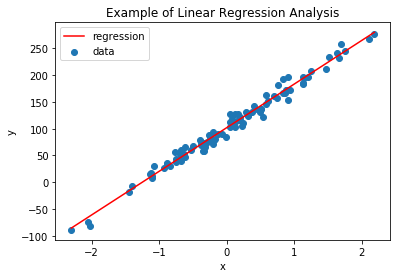

In [89]:
plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

In [91]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [92]:
boston = load_boston()
model_boston = LinearRegression().fit(boston.data,boston.target)

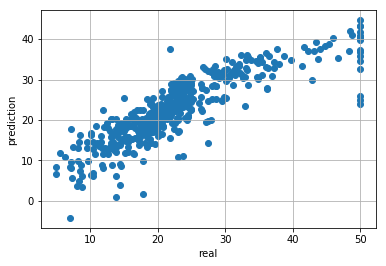

In [97]:
predictions = model_boston.predict(boston.data)
plt.scatter(boston.target,predictions)
plt.grid(b=True)
plt.xlabel('real')
plt.ylabel('prediction')
plt.show()

In [101]:
dfX0 = pd.DataFrame(boston.data,columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target,columns =['y'])

result = sm.OLS(dfy,dfX).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 26 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        14:59:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

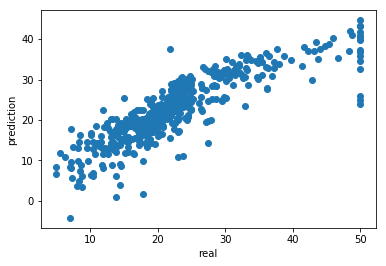

In [103]:
dfy_new = result.predict(dfX)
plt.scatter(dfy, dfy_new)
plt.xlabel(u"real")
plt.ylabel(u"prediction")
plt.show()

In [104]:
result.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

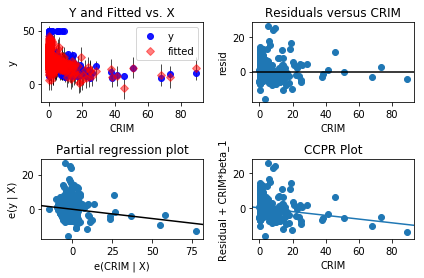

In [105]:
fig = sm.graphics.plot_regress_exog(result, "CRIM")
fig.suptitle("")
plt.show()